In [1]:
using MAT
using Plots

function blocks(A, rows)
    block_size = div(size(A,1),rows)
    blks = Array{SparseMatrixCSC, 2}(rows, rows)
    for x in 1:rows
        for y in 1:rows
            xr = (x-1)*block_size+1 : ((x == rows) ? size(A,1) : x * block_size)
            yr = (y-1)*block_size+1 : ((y == rows) ? size(A,1) : y * block_size)
            blks[x,y] = A[xr,yr]
        end
    end

    blks
end;

In [2]:
L_rand = matread(expanduser("~/laplacians/hollywood-2009_R.mat"))["L"];
L = matread(expanduser("~/laplacians/hollywood-2009.mat"))["L"];
# L_rand = matread(expanduser("~/laplacians/europe_osm_R.mat"))["L"];
# L = matread(expanduser("~/laplacians/europe_osm.mat"))["L"];

rows = 12

blks = blocks(L, 12);
blks_rand = blocks(L_rand, 12);


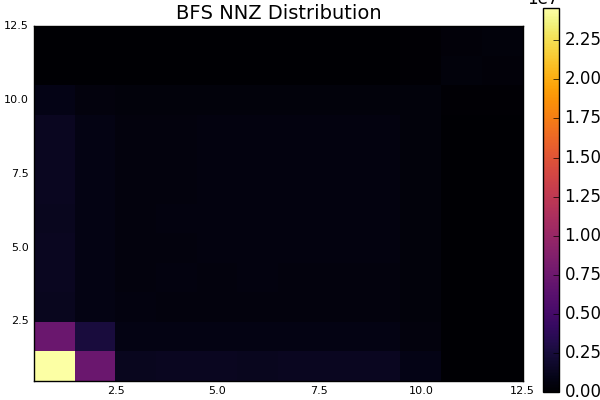

In [3]:
heatmap(map(nnz, blks), title="BFS NNZ Distribution")

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))



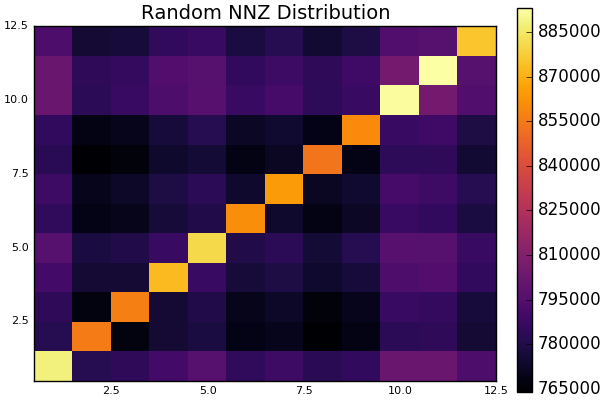

In [4]:
heatmap(map(nnz, blks_rand), title="Random NNZ Distribution")


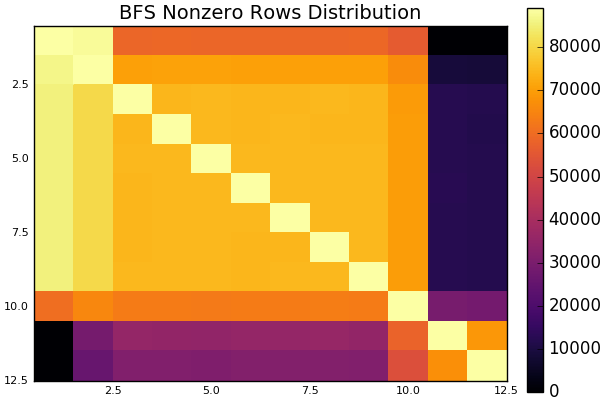

In [10]:
heatmap(map(x->length(unique(findn(x)[1])), blks), yflip=true, title="BFS Nonzero Rows Distribution")


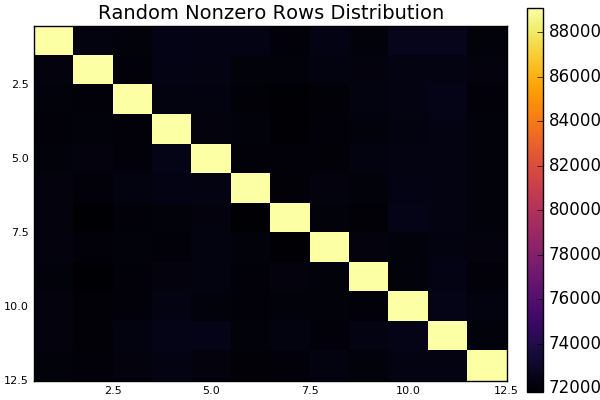

In [9]:
heatmap(map(x->length(unique(findn(x)[1])), blks_rand), yflip=true, title="Random Nonzero Rows Distribution")